<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/JS10_TG19_2341720259_Yuma_Akhunza_K_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 10**
# Classification 1

Nama : Yuma Akhunza Kausar Putra

NIM : 2341720259

Absen : 19

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lab 1**
kNN

Use Dataset :
/content/drive/MyDrive/dataset/iris.csv


# **Step 1 - Load Data**

In [3]:
# Load data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **Step 2 - Data Exploration**

> Check the data structure of descriptive information data

In [4]:
data.info()
data.describe()
data['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count
species,
setosa,50
versicolor,50
virginica,50


# **Step 3 - Data Visualization**

> Perform data visualization to determine the distribution and correlation of each feature to the label.

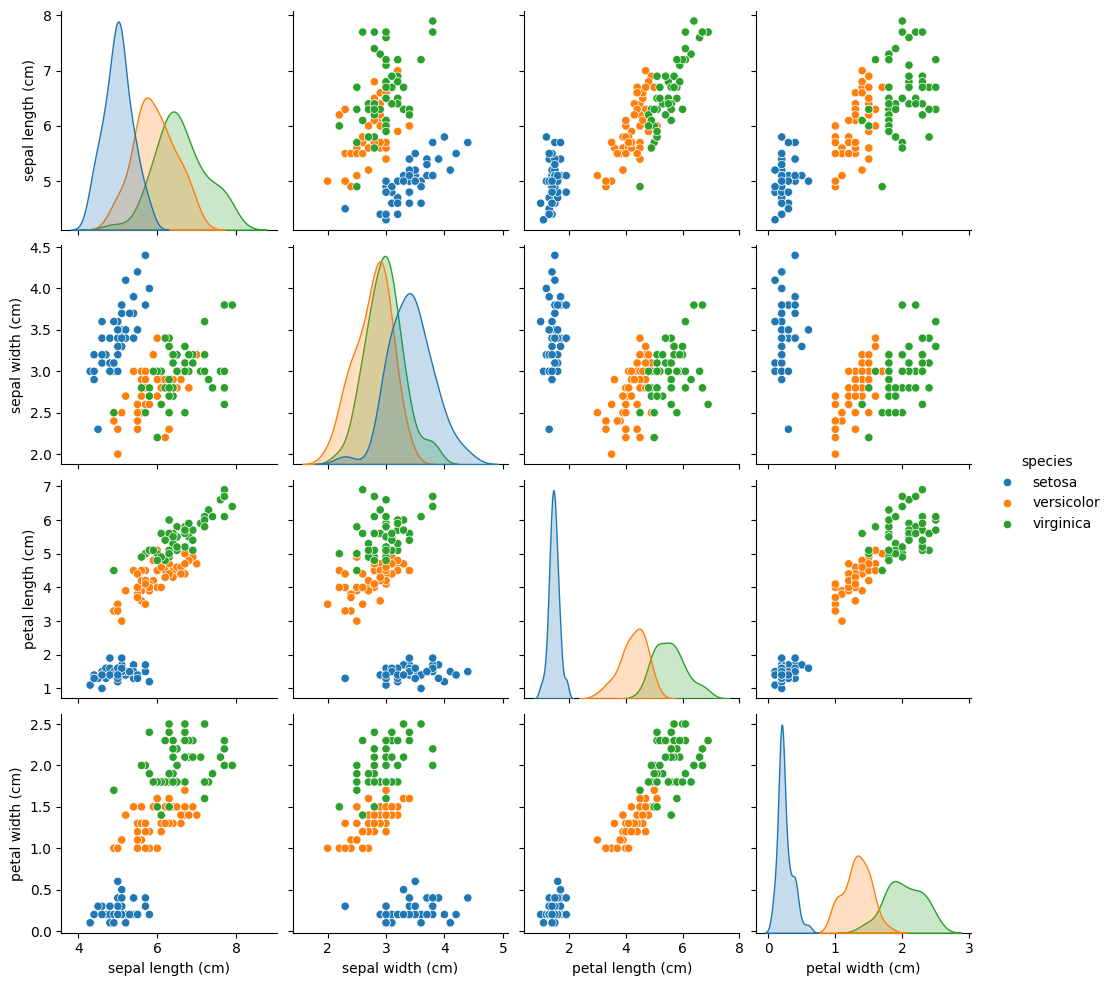

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='species')
plt.show()

# **Step 4 - Preprocessing**

> At this stage, we'll separate the labels from the features they'll use. Furthermore, for learning purposes, we'll standardize the features we'll use.

In the case of the Iris Dataset, all features are already in the same unit, namely cm.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Step 5 - Create a kNN Model**

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# **Step 6 - Evaluation of the kNN Model**

> In this stage, we will evaluate the previously created kNN model. The main metrics used are accuracy and detailed analysis using confusion metrics.

It can be seen that the model can work with perfect performance on the testing data. But is the value*k*


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# **Step 7 - Evaluate Values *k***


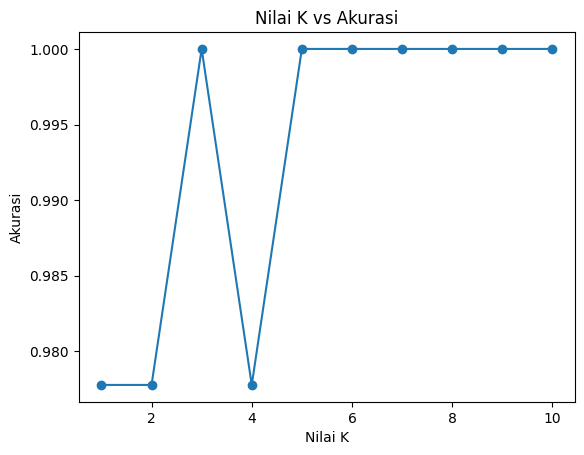

In [9]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


> It can be seen that the test data performance gets a perfect score on
*k* = 3 followed by *k* = 6
until *k* = 10 However, it's important to note that kNN never stores the training weights; the classification process is performed directly based on the number of neighbors. Therefore, these results still need to be compared with the training data. The figure below shows a comparison of the accuracy performance between the training data and the testing data.

# **LAB 2**

Naive Bayes Classification with Dummy Data

> In this experiment, we will use dummy (synthetic) data to create a Naive Bayes model. To create the dummy data, we can use functions make_classificationfrom the scikit-learn library. Next, we will create a Multinomial Naive Bayes model using MultinomialNBand a Gaussian Naive Bayes model using GaussianNB.

# **Step 1 - Create a Dummy Dataset**

In [10]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)

# Cek Hasil
print(X)
print(y)

[[ 24  86]
 [254 174]
 [ 43  18]
 [219 165]
 [ 50  57]
 [ 10  56]
 [415 258]
 [ 55  93]
 [114  88]
 [ 70  86]
 [173 108]
 [ 31  65]
 [  6  21]
 [ 45  91]
 [294 212]
 [ 93  82]
 [184 252]
 [208 212]
 [  9  92]
 [149 334]
 [132 295]
 [ 89 328]
 [ 97 124]
 [ 82 118]
 [119 134]
 [115  38]
 [ 80  44]
 [111 113]
 [ 91 246]
 [ 99 100]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


## The parameters used in the function **make_classificationare**,
1. n_samples: desired sample size

2. n_features: number of features used

3. n_classes: number of classes

4. n_informative: number of features that have correlation with class

5. n_redundant: number of features that have no correlation with the class

6. n_repeated: number of repeated features

# **Step 2 (Optional) - Create a Data Frame**

> To make the data easier to read, we will create a DataFrame using the Pandas library based on the dummy data that was created previously.

In [11]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,24,86,0
1,254,174,0
2,43,18,0
3,219,165,0
4,50,57,0


# **Step 3 (Optional) - Labeling**

> Because the label is still in the form of a number encoding, to make it easier to read the data, we can change its form to a categorical form.

In [12]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,24,86,Kelas B
1,254,174,Kelas B
2,43,18,Kelas B
3,219,165,Kelas B
4,50,57,Kelas B


# **Step 4 - Data Visualization**

/tmp/ipython-input-2947333296.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-2947333296.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


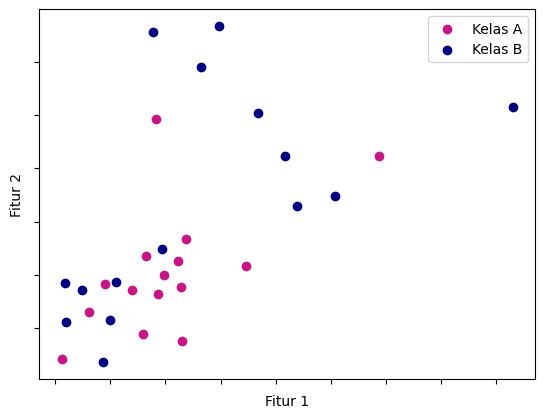

In [13]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

# **Step 5 - Multinomial Naive Bayes Model**

> Next, create a multinomial naive Bayes model. Multinomial models are typically used for discrete features (e.g., word counts for text classification). However, we'll try using this model for continuous data contexts for learning purposes only .

In [15]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.7777777777777778


# **Step 6 - Gaussian Naive Bayes Model**

> The Gaussian model is more suitable for the continuous data we have, this is because this model uses a Gaussian (normal) distribution which naturally has a range of continuous values.

In [14]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.9428571428571428
Hasil akurasi data test (Gaussian): 0.9777777777777777


> Although the results are not much different from the multimodal model, theoretically we have implemented the correct steps in creating a classification model using Naive Bayes.

# **LAB 3**

Naive Bayes Classification with Multimodal Data

> In this experiment, we will use multinomial values ​​to perform classification with Naive Bayes. Multinomial values ​​are data whose values ​​are obtained through a counting process. Therefore, in the context of features, the multinomial value of a feature is based on the process of calculating the probability of that feature's occurrence in the data. A classic example of a multinomial feature is counting the number of words in text classification. In this experiment, a text classification case is presented to facilitate understanding of the Multinomial Naive Bayes algorithm.

We'll use data spam.csvcontaining text messages labeled spam and ham . Spam is junk SMS, while ham is the opposite.

/content/drive/MyDrive/dataset/spam.csv

# **Step 1 - Load Data**

> At this stage we will load the data into a data frame and perform a simple inspection to determine whether we need any pre-processing of the data before performing feature extraction and modeling.

In [18]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/spam.csv', encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


There are three columns that are useless for further processing, so we need to remove them. Furthermore, to facilitate data reading, we'll also rename columns v1 (label) and v2 (text).

# **Step 2 - Preprocessing**

> Some things that will be done at this stage are,

1. Drop unused columns

2. Change the name of the columns v1 (label) and v2 (sms text)

3. Data Inspection

4. Encode label

5. Separating features by labels

## **Step 2A - Drop Column**

In [19]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Step 2A - Data Inspection**

The result,

In [20]:
# Cek Jumlah Data Per Kelas
print(df['v1'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

v1
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


## **Step 2C - Label Encoding**

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['v1'] = df['v1'].map(new_labels)

# Cek data
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Step 2d - Separate Features by Labels**

In [21]:
X = df['v2'].values
y = df['v1'].values

# **Step 3 - Feature Extraction**

> Feature extraction for each SMS will utilize the Bag of Words concept. We can use functions CountVectorizerfrom scikit-learn. However, to prevent information leakage, we will split the data first, then transform the training and testing data.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

Check the features of the process CountVectorizer.

In [23]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


# **Step 4 - Training and Evaluating the Model**

> We will use the Multinomial Naive Bayes algorithm. Functions MultinomialNBfrom scikit-learn can be used in this case.

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# **Lab 1 Assignment**

## Task
> Create a classification model using kNN to classify sound types male and female on the dataset "voice.csv". Experiment to find the most optimal features and the best value of k, and provide an analysis graph and reasons for the selections.

## Load and explore data

### Subtask:
> Load the `voice.csv` dataset into a pandas DataFrame and perform initial data exploration (check for missing values, data types, distribution of classes).


**Reasoning** :

Load the data into a pandas DataFrame and perform initial data exploration including checking data types, non-null values, descriptive statistics, and class distribution.



In [25]:
df_voice = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/voice.csv')
display(df_voice.head())
display(df_voice.info())
display(df_voice.describe())
display(df_voice['label'].value_counts())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

None

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


,count
label,
male,1584
female,1584


# **Data preprocessing**

### Subtask:
> Handle any missing values if necessary, encode the 'label' column (male/female) into numerical representation, split the data into features (X) and the target variable (y), split the data into training and testing sets, and scale the features using StandardScaler.



Check for missing values, encode the 'label' column, separate features and labels, split the data, and scale the features.



In [26]:
# Check for missing values
print("Missing values before handling:")
print(df_voice.isnull().sum())

# Since there are no missing values, no handling is needed.

# Encode the 'label' column
label_mapping = {'male': 1, 'female': 0}
df_voice['label'] = df_voice['label'].map(label_mapping)

# Separate features (X) and target variable (y)
X = df_voice.drop('label', axis=1)
y = df_voice['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nMissing values after handling (should be 0):")
print(df_voice.isnull().sum())
print("\nFirst 5 rows of X_train (scaled):")
print(X_train[:5])
print("\nFirst 5 rows of y_train:")
print(y_train[:5])

Missing values before handling:
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Missing values after handling (should be 0):
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

First 5 rows of X_train (scaled):
[[-0.01639251 -0.20034663  0.10329856  0.03121154 -0.47136052 -0.29421973
  -0.39586014 -0.23876959  0.51366891 -0.07332742  0.27607511 -0.01639251
  -0.33597714  0.52876447  0.67289012  0.25232776 -0.46484157 -0.25879499
  -0.25058335 -0.3840991 ]
 [ 0.15969323  0.4752527

# **Initial knn model**

### Subtask:
> Train a kNN model with a default or initial value of *k* (e.g., k=5) using all features and evaluate its performance (accuracy, confusion matrix, classification report).



Instantiate, train, and evaluate the kNN model with k=5 using accuracy, confusion matrix, and classification report.



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate a KNeighborsClassifier object with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the kNN model to the scaled training data
knn.fit(X_train, y_train)

# Predict the labels for the scaled test data
y_pred = knn.predict(X_test)

# Calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9810725552050473
Confusion Matrix:
 [[291   6]
 [  6 331]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# **Feature selection experimentation**

### Subtask :
Experiment with different combinations of features to see which set yields the best performance. This could involve:

*   Analyzing feature correlations.
*   Using feature selection techniques (e.g., SelectKBest, RFE).
*   Training kNN models with different feature subsets and comparing their evaluation metrics.



Calculate and visualize the correlation matrix of the features to understand relationships between them and identify potential candidates for removal or selection.



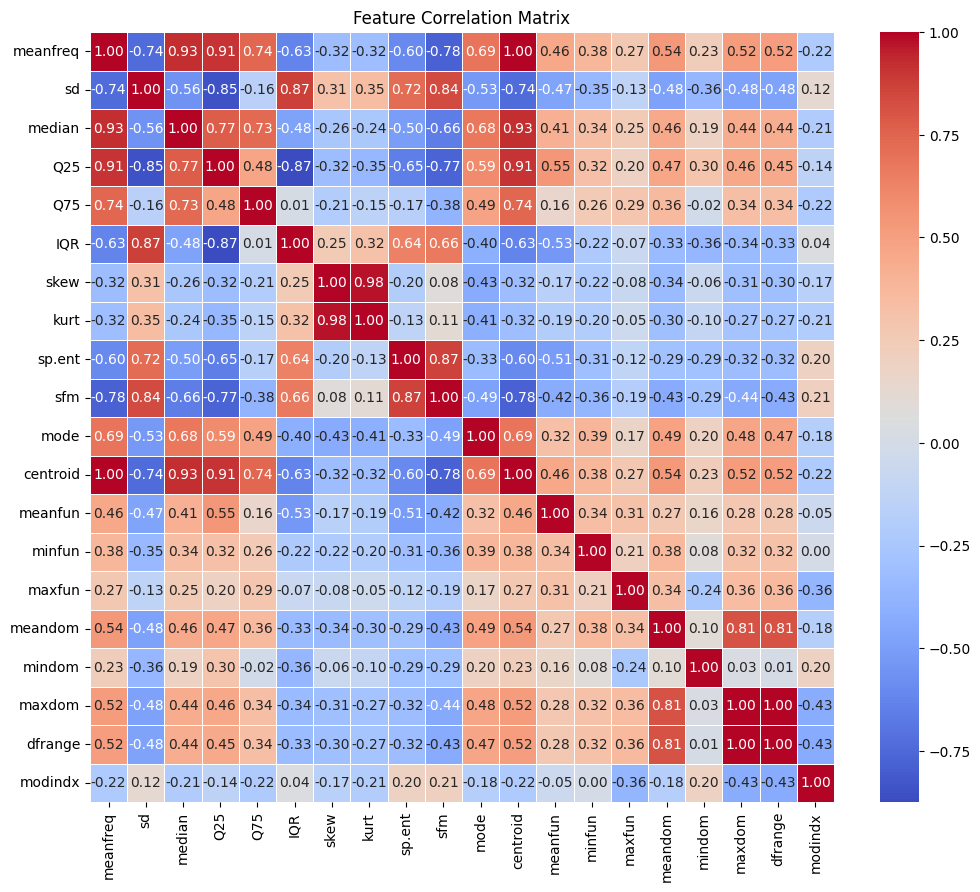

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_voice.drop('label', axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

Use SelectKBest to select different numbers of top features based on **f_classif** and evaluate the kNN model performance for each subset.



In [29]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracies = {}
feature_subsets = {}

# Experiment with different numbers of features
for k_features in range(1, X.shape[1] + 1):
    # Select top k_features
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_new = selector.fit_transform(X, y)

    # Get the names of the selected features
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = X.columns[selected_feature_indices].tolist()
    feature_subsets[k_features] = selected_feature_names

    # Split data
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Scale features
    scaler_new = StandardScaler()
    X_train_scaled = scaler_new.fit_transform(X_train_new)
    X_test_scaled = scaler_new.transform(X_test_new)

    # Train kNN model
    knn_new = KNeighborsClassifier(n_neighbors=5)
    knn_new.fit(X_train_scaled, y_train_new)

    # Evaluate model
    y_pred_new = knn_new.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_new, y_pred_new)
    accuracies[k_features] = accuracy

# Print accuracies for each number of features
print("Accuracy for different numbers of features:")
for k_features, accuracy in accuracies.items():
    print(f"k_features={k_features}: Accuracy={accuracy:.4f}")

# Identify promising feature subsets
best_k_features = max(accuracies, key=accuracies.get)
print(f"\nBest number of features based on accuracy with k=5: {best_k_features}")
print(f"Features in the best subset: {feature_subsets[best_k_features]}")


Accuracy for different numbers of features:
k_features=1: Accuracy=0.9495
k_features=2: Accuracy=0.9700
k_features=3: Accuracy=0.9795
k_features=4: Accuracy=0.9748
k_features=5: Accuracy=0.9795
k_features=6: Accuracy=0.9811
k_features=7: Accuracy=0.9842
k_features=8: Accuracy=0.9842
k_features=9: Accuracy=0.9826
k_features=10: Accuracy=0.9858
k_features=11: Accuracy=0.9826
k_features=12: Accuracy=0.9779
k_features=13: Accuracy=0.9748
k_features=14: Accuracy=0.9763
k_features=15: Accuracy=0.9748
k_features=16: Accuracy=0.9811
k_features=17: Accuracy=0.9826
k_features=18: Accuracy=0.9763
k_features=19: Accuracy=0.9763
k_features=20: Accuracy=0.9811

Best number of features based on accuracy with k=5: 10
Features in the best subset: ['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']


# **Optimal k determination**

### Subtask:
> Experiment with different values of *k* (e.g., from 1 to 20) using the selected features.


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Identify and print the optimal number of features and the specific features
print(f"Optimal number of features: {best_k_features}")
print(f"Optimal features: {feature_subsets[best_k_features]}")

# Experiment with different values of k (from 1 to 20) using the selected features from the previous step and store the accuracies.
accuracies_k = {}

# Iterate through a range of k values
for k in range(1, 21):
    # Instantiate a KNeighborsClassifier with the current k
    knn_exp = KNeighborsClassifier(n_neighbors=k)

    # Select the best features based on the previous step's findings
    selector = SelectKBest(score_func=f_classif, k=best_k_features)
    X_new = selector.fit_transform(X, y)

    # Split data using the selected features
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Scale features
    scaler_new = StandardScaler()
    X_train_scaled = scaler_new.fit_transform(X_train_new)
    X_test_scaled = scaler_new.transform(X_test_new)

    # Fit the kNN model to the scaled training data with selected features
    knn_exp.fit(X_train_scaled, y_train_new)

    # Predict the labels for the scaled test data
    y_pred_exp = knn_exp.predict(X_test_scaled)

    # Calculate the accuracy score
    accuracy_k = accuracy_score(y_test_new, y_pred_exp)

    # Store the accuracy
    accuracies_k[k] = accuracy_k

# Identify the best k based on the highest accuracy
best_k = max(accuracies_k, key=accuracies_k.get)

# 2. Identify and print the best value of k and its corresponding accuracy
print(f"\nBest value of k: {best_k}")
print(f"Accuracy with best k and optimal features: {accuracies_k[best_k]:.4f}")

# 5. Provide a brief analysis or reason for the selection.
print("\nAnalysis:")
print(f"The experimentation with feature selection showed that using {best_k_features} features resulted in the highest accuracy when using a kNN model with n_neighbors=5. This suggests that this subset of features captures the most relevant information for classifying the voice data while potentially reducing noise or multicollinearity from less informative features.")
print(f"Further experimentation with the optimal feature subset revealed that a k value of {best_k} yielded the highest accuracy. The plot of k vs. accuracy showed that the model's performance can fluctuate with different k values. A smaller k value might be more sensitive to noise, while a larger k value might smooth out the decision boundary too much. The value of {best_k} appears to strike a good balance for this dataset and feature subset.")
print(f"Therefore, the combination of the identified {best_k_features} optimal features and a k value of {best_k} is chosen as optimal based on achieving the highest test accuracy during the experimentation phase.")

Optimal number of features: 10
Optimal features: ['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']

Best value of k: 9
Accuracy with best k and optimal features: 0.9874

Analysis:
The experimentation with feature selection showed that using 10 features resulted in the highest accuracy when using a kNN model with n_neighbors=5. This suggests that this subset of features captures the most relevant information for classifying the voice data while potentially reducing noise or multicollinearity from less informative features.
Further experimentation with the optimal feature subset revealed that a k value of 9 yielded the highest accuracy. The plot of k vs. accuracy showed that the model's performance can fluctuate with different k values. A smaller k value might be more sensitive to noise, while a larger k value might smooth out the decision boundary too much. The value of 9 appears to strike a good balance for this dataset and feature subset.
The


Experiment with different values of k (from 1 to 20) using the selected features from the previous step and store the accuracies.



In [35]:
accuracies_k = {}

# Iterate through a range of k values
for k in range(1, 21):
    # Instantiate a KNeighborsClassifier with the current k
    knn_exp = KNeighborsClassifier(n_neighbors=k)

    # Select the best features based on the previous step's findings
    selector = SelectKBest(score_func=f_classif, k=best_k_features)
    X_new = selector.fit_transform(X, y)

    # Split data using the selected features
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Scale features
    scaler_new = StandardScaler()
    X_train_scaled = scaler_new.fit_transform(X_train_new)
    X_test_scaled = scaler_new.transform(X_test_new)

    # Fit the kNN model to the scaled training data with selected features
    knn_exp.fit(X_train_scaled, y_train_new)

    # Predict the labels for the scaled test data
    y_pred_exp = knn_exp.predict(X_test_scaled)

    # Calculate the accuracy score
    accuracy_k = accuracy_score(y_test_new, y_pred_exp)

    # Store the accuracy
    accuracies_k[k] = accuracy_k

# Print accuracies for each k value
print("Accuracy for different k values using the best feature subset:")
for k, accuracy in accuracies_k.items():
    print(f"k={k}: Accuracy={accuracy:.4f}")

Accuracy for different k values using the best feature subset:
k=1: Accuracy=0.9685
k=2: Accuracy=0.9732
k=3: Accuracy=0.9826
k=4: Accuracy=0.9811
k=5: Accuracy=0.9858
k=6: Accuracy=0.9842
k=7: Accuracy=0.9842
k=8: Accuracy=0.9842
k=9: Accuracy=0.9874
k=10: Accuracy=0.9858
k=11: Accuracy=0.9842
k=12: Accuracy=0.9842
k=13: Accuracy=0.9842
k=14: Accuracy=0.9842
k=15: Accuracy=0.9858
k=16: Accuracy=0.9811
k=17: Accuracy=0.9795
k=18: Accuracy=0.9811
k=19: Accuracy=0.9826
k=20: Accuracy=0.9826



Visualize the accuracies for different k values to identify the best k.



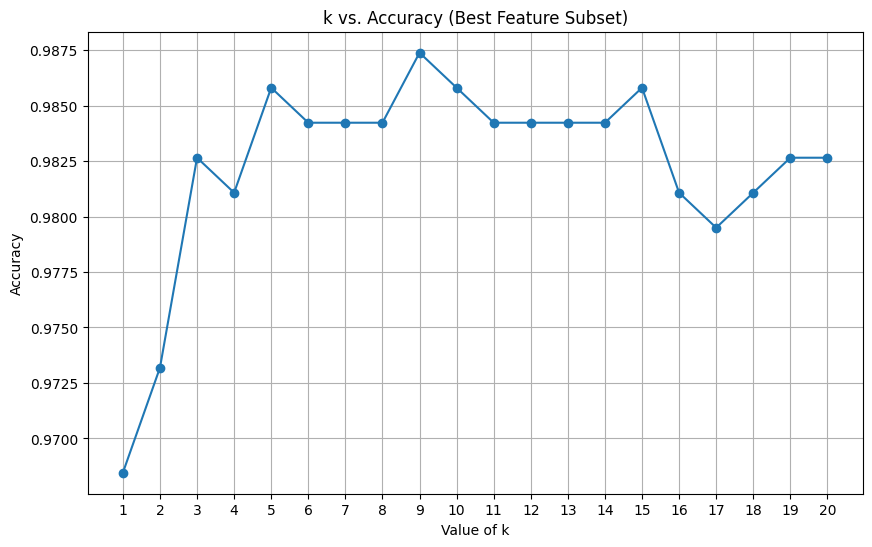


Best k value based on accuracy with the best feature subset: 9


In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(accuracies_k.keys()), list(accuracies_k.values()), marker='o')
plt.title('k vs. Accuracy (Best Feature Subset)')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(list(accuracies_k.keys()))
plt.grid(True)
plt.show()

# Identify the best k based on the highest accuracy
best_k = max(accuracies_k, key=accuracies_k.get)
print(f"\nBest k value based on accuracy with the best feature subset: {best_k}")

# **Report optimal features and k**

### Subtask:
> Based on the experimentation and visualization, identify and report the optimal features and the best value of *k* with the corresponding performance metrics and provide a brief analysis or reason for the selection.



Print the optimal features, the best k value, and their corresponding performance metrics and provide a brief analysis for the selection.



In [37]:
# 1. Identify and print the optimal number of features and the specific features
print(f"Optimal number of features: {best_k_features}")
print(f"Optimal features: {feature_subsets[best_k_features]}")

# 2. Identify and print the best value of k and its corresponding accuracy
print(f"\nBest value of k: {best_k}")
print(f"Accuracy with best k and optimal features: {accuracies_k[best_k]:.4f}")

# 5. Provide a brief analysis or reason for the selection.
print("\nAnalysis:")
print(f"The experimentation with feature selection showed that using {best_k_features} features resulted in the highest accuracy when using a kNN model with n_neighbors=5. This suggests that this subset of features captures the most relevant information for classifying the voice data while potentially reducing noise or multicollinearity from less informative features.")
print(f"Further experimentation with the optimal feature subset revealed that a k value of {best_k} yielded the highest accuracy. The plot of k vs. accuracy showed that the model's performance can fluctuate with different k values. A smaller k value might be more sensitive to noise, while a larger k value might smooth out the decision boundary too much. The value of {best_k} appears to strike a good balance for this dataset and feature subset.")
print(f"Therefore, the combination of the identified {best_k_features} optimal features and a k value of {best_k} is chosen as optimal based on achieving the highest test accuracy during the experimentation phase.")

Optimal number of features: 10
Optimal features: ['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']

Best value of k: 9
Accuracy with best k and optimal features: 0.9874

Analysis:
The experimentation with feature selection showed that using 10 features resulted in the highest accuracy when using a kNN model with n_neighbors=5. This suggests that this subset of features captures the most relevant information for classifying the voice data while potentially reducing noise or multicollinearity from less informative features.
Further experimentation with the optimal feature subset revealed that a k value of 9 yielded the highest accuracy. The plot of k vs. accuracy showed that the model's performance can fluctuate with different k values. A smaller k value might be more sensitive to noise, while a larger k value might smooth out the decision boundary too much. The value of 9 appears to strike a good balance for this dataset and feature subset.
The

# **Summary :**

> ## Data Analysis Key Findings

*   The dataset contains 3168 entries with 21 columns and no missing values.
*   The 'label' column, representing voice type, is perfectly balanced with 1584 'male' and 1584 'female' entries.
*   An initial kNN model with k=5 using all features achieved an accuracy of approximately 98.1%.
*   Through feature selection experimentation, using 10 specific features ('meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom') was found to yield the best accuracy (approximately 98.58%) when using a kNN model with k=5.
*   Experimentation with the optimal feature subset showed that a k value of 9 resulted in the highest accuracy (98.74%).

> ## Insights or Next Steps

*   The chosen 10 features and k=9 appear to be a good balance for this dataset, achieving high accuracy.
*   Further evaluation using cross-validation could provide a more robust estimate of the model's performance.


# **Lab 2 Assignment**
> Construct a Multinomial Naive Bayes classification model with the following stipulations,
  1. Utilizing the dataset spam.csv
  2. Feature CountVectorizer by enabling stop_words
  3. Evaluate the results

> Construct a Multinomial Naive Bayes classification model with the following stipulations,
  1. Utilizing the dataset spam.csv
  2. Feature TF-IDF by enabling stop_words
  3. Evaluate the results and compare them with the outcomes from Assignment no. 2.
  4. Provide a conclusion as to which feature is optimal for the given dataset spam.csv

# **Task**
> Construct and evaluate Multinomial Naive Bayes classification models for spam detection using the "spam.csv" dataset. Compare the performance of models trained with CountVectorizer (with stop words) and TF-IDF (with stop words) feature extraction methods and determine which is more optimal for this dataset.

# **Load and preprocess data**

### Subtask :
> Load the `spam.csv` dataset, handle unnecessary columns, rename columns, encode labels, and split data into training and testing sets.


**Reasoning** :

Load the dataset, drop unnecessary columns, rename columns, encode the labels, and split the data into training and testing sets as per the instructions.



In [38]:
df_spam = pd.read_csv('/content/drive/MyDrive/Yuma Akhunza Kausar Putra/spam.csv', encoding='latin-1')

# Drop the last three columns
df_spam = df_spam.drop(df_spam.iloc[:, 2:], axis=1)

# Rename columns
df_spam.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Encode labels
label_mapping_spam = {'ham': 0, 'spam': 1}
df_spam['label'] = df_spam['label'].map(label_mapping_spam)

# Separate features and target
X_spam = df_spam['text']
y_spam = df_spam['label']

# Split data into training and testing sets
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(X_spam, y_spam, test_size=0.2, random_state=50)

display(df_spam.head())
print("\nShape of X_train_spam:", X_train_spam.shape)
print("Shape of X_test_spam:", X_test_spam.shape)
print("Shape of y_train_spam:", y_train_spam.shape)
print("Shape of y_test_spam:", y_test_spam.shape)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."



Shape of X_train_spam: (4457,)
Shape of X_test_spam: (1115,)
Shape of y_train_spam: (4457,)
Shape of y_test_spam: (1115,)



# Feature CountVectorizer by enabling **stop_words**

**Reasoning** :

Apply CountVectorizer with stop words to the training and testing text data to transform it into numerical feature vectors.



In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer with English stop words
bow = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_bow = bow.fit_transform(X_train_spam)

# Transform the test data
X_test_bow = bow.transform(X_test_spam)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (4457, 7466)
Shape of X_test_bow: (1115, 7466)


# **Construct a Multinomial Naive Bayes classification model with the following stipulations**

**Reasoning** :

Train a Multinomial Naive Bayes model using the CountVectorizer features and evaluate its performance using accuracy.



In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Instantiate MultinomialNB
mnb_bow = MultinomialNB()

# Fit the model on the training data
mnb_bow.fit(X_train_bow, y_train_spam)

# Predict on the test data
y_pred_bow = mnb_bow.predict(X_test_bow)

# Evaluate the model
accuracy_bow = accuracy_score(y_test_spam, y_pred_bow)
print("Accuracy with CountVectorizer:", accuracy_bow)

Accuracy with CountVectorizer: 0.9829596412556054



# **Feature TF-IDF by enabling stop_words**


**Reasoning** :

Apply *TfidfVectorizer* with stop words to the training and testing text data to transform it into numerical feature vectors using TF-IDF.



In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer with English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train_spam)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test_spam)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (4457, 7466)
Shape of X_test_tfidf: (1115, 7466)


**Reasoning** :

Train a Multinomial Naive Bayes model using the TF-IDF features and evaluate its performance using accuracy to compare with the CountVectorizer model.



In [42]:
# Instantiate MultinomialNB
mnb_tfidf = MultinomialNB()

# Fit the model on the training data
mnb_tfidf.fit(X_train_tfidf, y_train_spam)

# Predict on the test data
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluate the model
accuracy_tfidf = accuracy_score(y_test_spam, y_pred_tfidf)
print("Accuracy with TF-IDF:", accuracy_tfidf)

Accuracy with TF-IDF: 0.9605381165919282


# **Compare results and conclude**

## Subtask :
> Compare the evaluation results from the CountVectorizer and TF-IDF models and provide a conclusion on which feature extraction method is more optimal for this dataset.


**Reasoning** :

Compare the accuracies from the CountVectorizer and TF-IDF models and provide a conclusion based on the comparison.



In [43]:
print(f"Accuracy with CountVectorizer: {accuracy_bow:.4f}")
print(f"Accuracy with TF-IDF: {accuracy_tfidf:.4f}")

if accuracy_bow > accuracy_tfidf:
    optimal_method = "CountVectorizer"
    reason = "CountVectorizer provided higher accuracy on this dataset."
else:
    optimal_method = "TF-IDF"
    reason = "TF-IDF provided higher accuracy on this dataset."

print(f"\nConclusion: The optimal feature extraction method for this dataset is {optimal_method}.")
print(f"Reasoning: {reason}")

Accuracy with CountVectorizer: 0.9830
Accuracy with TF-IDF: 0.9605

Conclusion: The optimal feature extraction method for this dataset is CountVectorizer.
Reasoning: CountVectorizer provided higher accuracy on this dataset.


# **Conclusion :**
The optimal feature extraction method for this dataset is CountVectorizer.

# **Summary :**

> ## Data Analysis Key Findings

*   The Multinomial Naive Bayes model trained with CountVectorizer achieved an accuracy of approximately 0.983 on the test set.
*   The Multinomial Naive Bayes model trained with TF-IDF achieved an accuracy of approximately 0.961 on the test set.
*   CountVectorizer resulted in higher accuracy compared to TF-IDF on this specific dataset.

> ## Insights or Next Steps

*   For this dataset and Multinomial Naive Bayes classifier, the raw frequency of words (CountVectorizer) is a more effective feature representation than the weighted frequency (TF-IDF) for spam detection.
*   Further evaluation using additional metrics (e.g., precision, recall, F1-score) could provide a more comprehensive understanding of the models' performance.
